Codigo de limpieza de data set

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
# import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd

### Cargamos el data set 

In [2]:
data = pd.read_csv('./Data_unido_2018_2021.csv')
print('Carga completa')

Carga completa


C:\Users\rod_e\AppData\Local\Temp\ipykernel_6608\2764910018.py:1: DtypeWarning: Columns (13,28,29,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./Data_unido_2018_2021.csv')


In [3]:
data['año'].value_counts()

2016    18038
2017    17597
2018    15718
2019    15129
2021    12292
2020    11267
2015        1
Name: año, dtype: int64

### Correlacion

Una vez cargado el dataset vamos a relizar el análisis de correlación solamente con las variables númericas. Obtenemos la siguiente gráfica.

Empezaremos calculando la correlación de Pearson

In [18]:
dict_corre = dict()

for column in data.select_dtypes(['number']).columns:
    for col in data.select_dtypes(['number']).columns:
        if column != col:
            dict_corre[str(f'{column} y {col}')] = data[column].corr(data[col], method='pearson')
        # print(f'Correlación Pearson, entre: {column} y {col}', data[column].corr(data[col], method='pearson'))
        
# Ordenamos los valores de mayor a menor
dict_corre = dict(sorted(dict_corre.items(), key=lambda item:item[1], reverse=True))

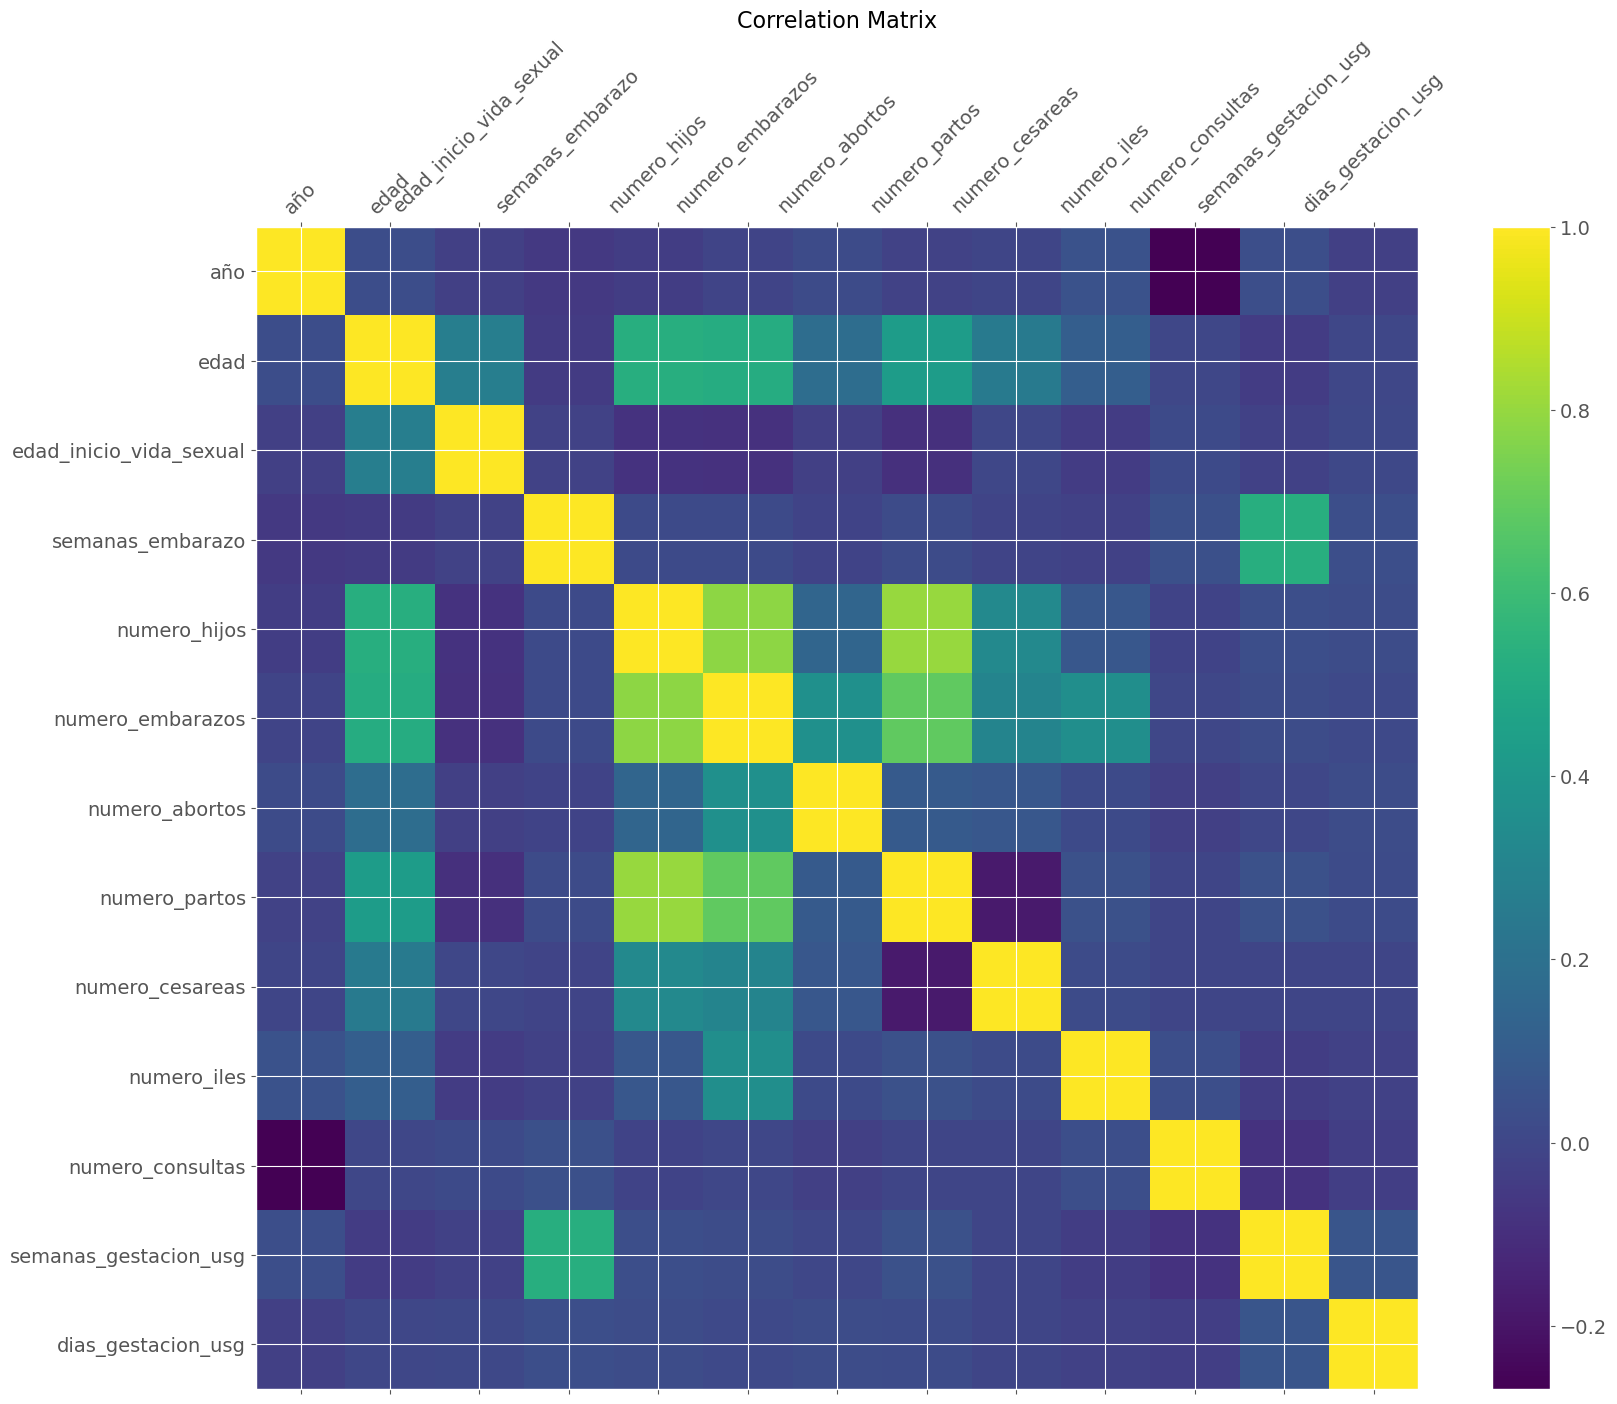

In [20]:
f = plt.figure(figsize=(19, 15))

plt.matshow(data.corr(method='pearson'), fignum=f.number)

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)

plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16);

Ahora con la correlación por el metodo Sperman

In [21]:
dict_corre_sperman = dict()

for column in data.select_dtypes(['number']).columns:
    for col in data.select_dtypes(['number']).columns:
        if column != col:
            dict_corre_sperman[str(f'{column} y {col}')] = data[column].corr(data[col], method='spearman')
        # print(f'Correlación Pearson, entre: {column} y {col}', data[column].corr(data[col], method='pearson'))
        
# Ordenamos los valores de mayor a menor
dict_corre_sperman = dict(sorted(dict_corre.items(), key=lambda item:item[1], reverse=True))

Obtenemos su gráfica correspondiente

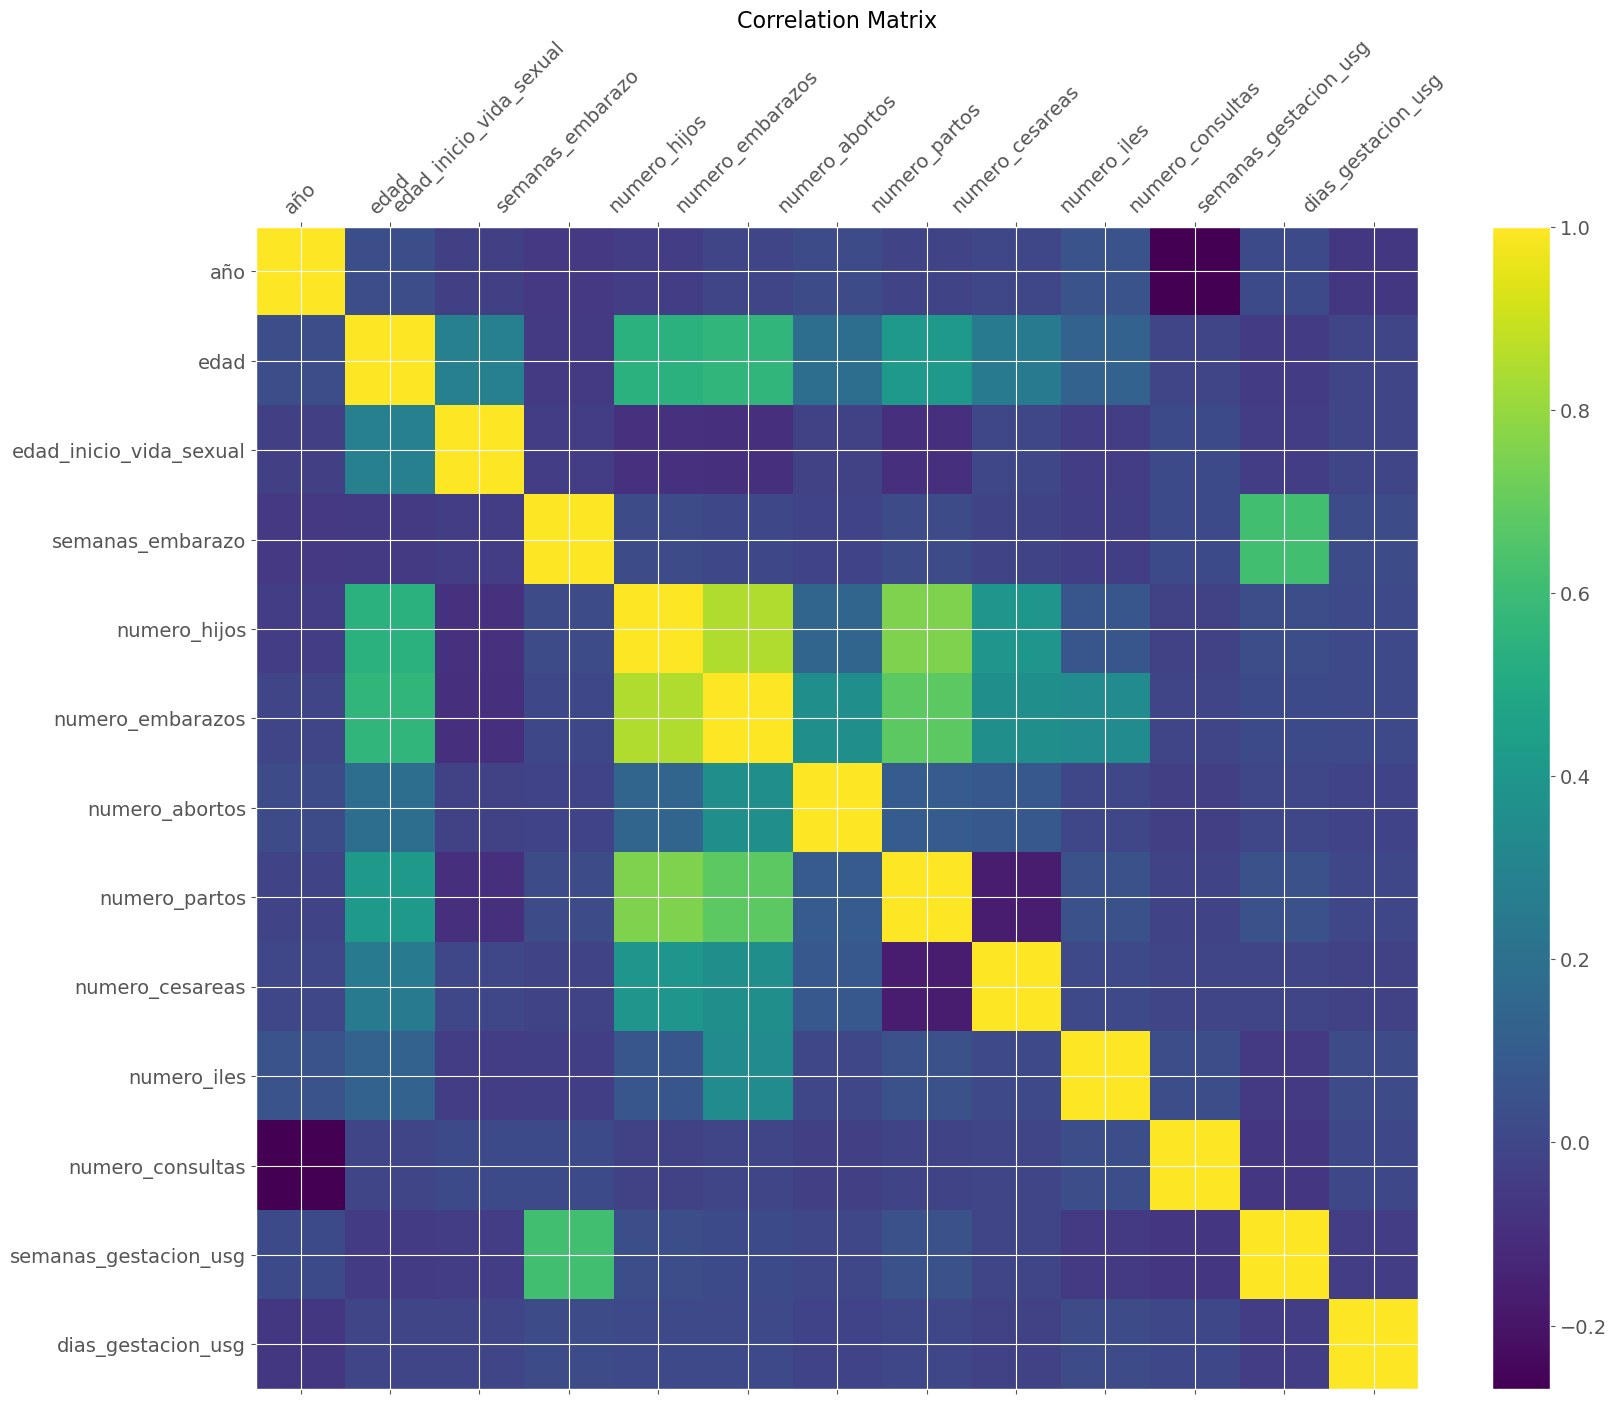

In [23]:
f = plt.figure(figsize=(19, 15))

plt.matshow(data.corr(method='spearman'), fignum=f.number)

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)

plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16);

### Correlacion de Kendall


In [24]:
dict_corre_kendall = dict()

for column in data.select_dtypes(['number']).columns:
    for col in data.select_dtypes(['number']).columns:
        if column != col:
            dict_corre_kendall[str(f'{column} y {col}')] = data[column].corr(data[col], method='kendall')
        # print(f'Correlación Pearson, entre: {column} y {col}', data[column].corr(data[col], method='pearson'))
        
# Ordenamos los valores de mayor a menor
dict_corre_kendall = dict(sorted(dict_corre.items(), key=lambda item:item[1], reverse=True))

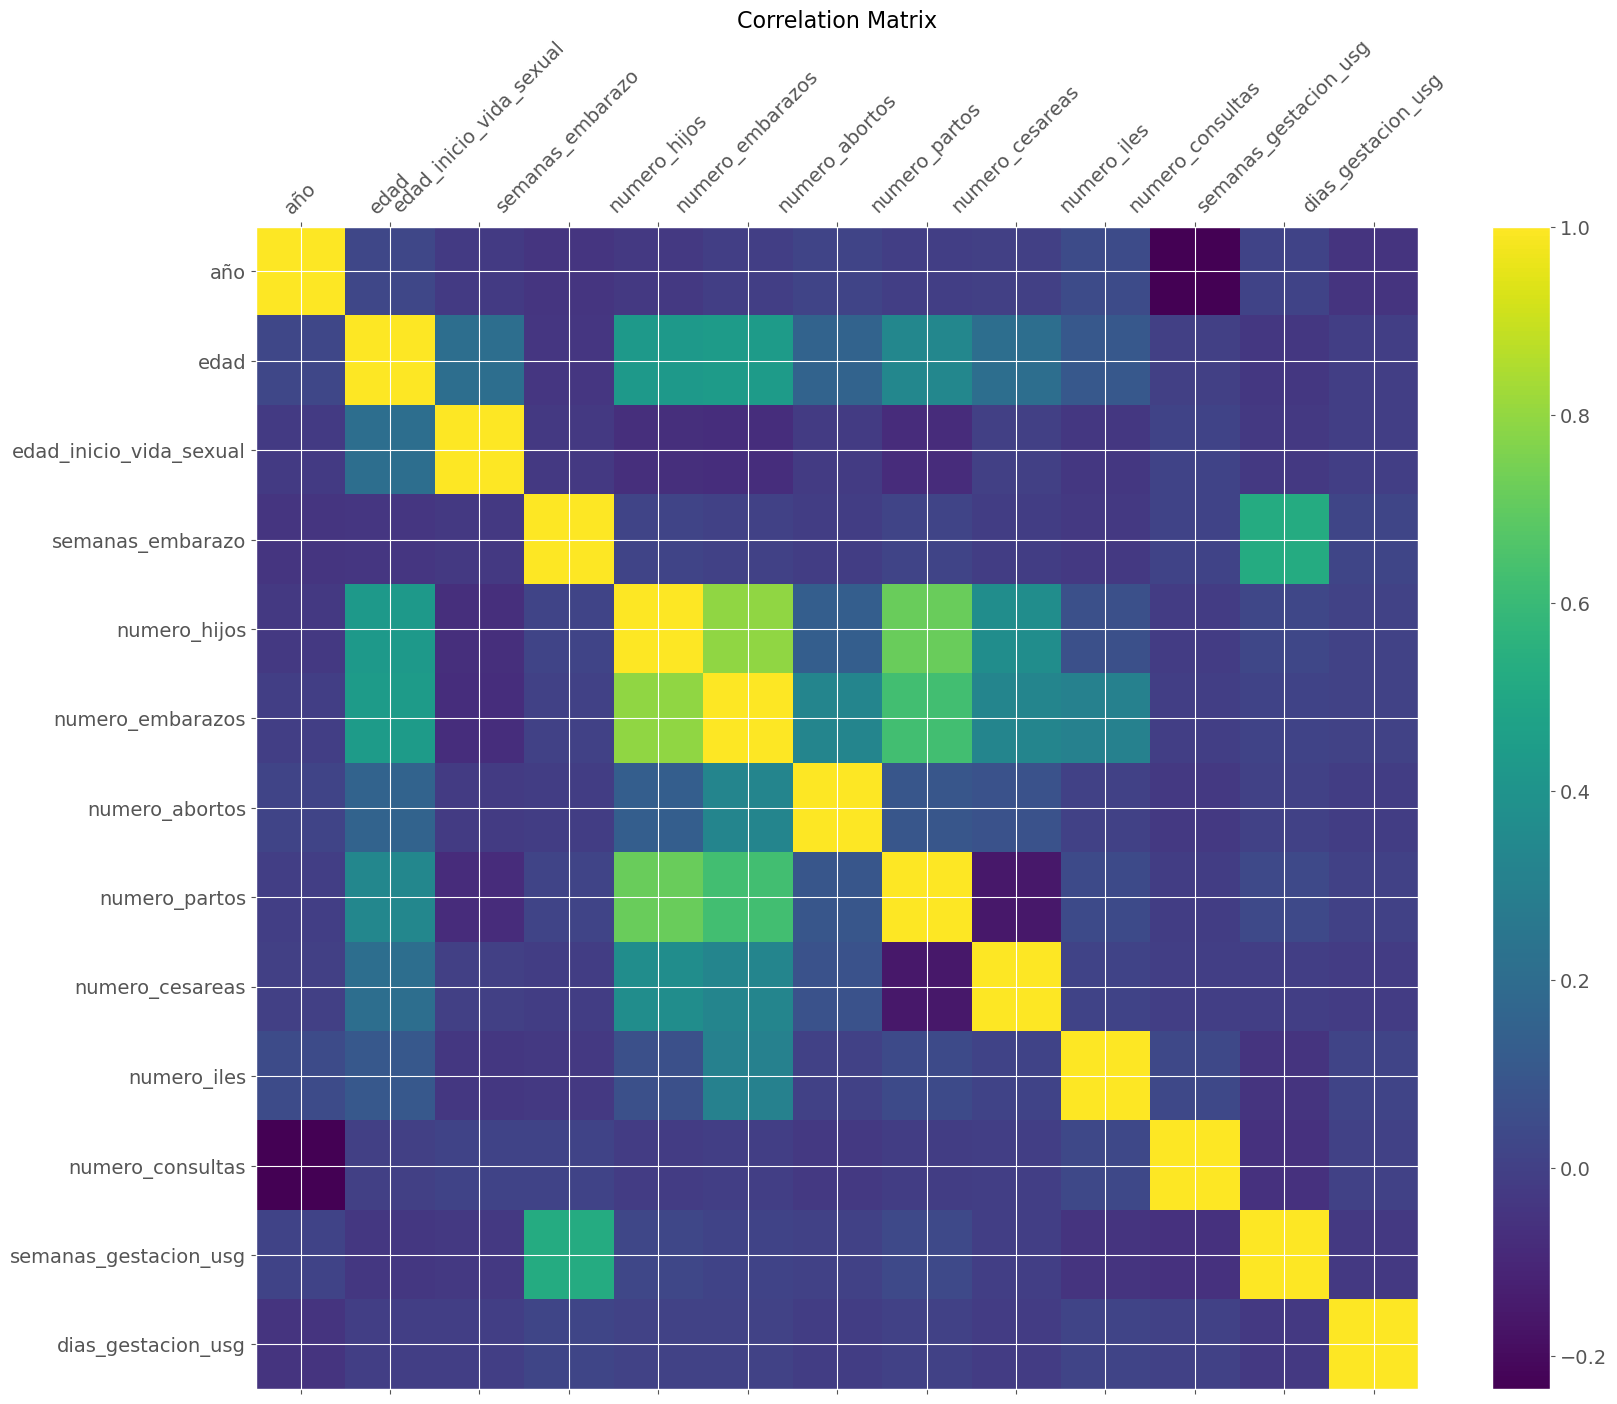

In [26]:
f = plt.figure(figsize=(19, 15))

plt.matshow(data.corr(method='kendall'), fignum=f.number)

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)

plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()

cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16);